In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install split_folders

In [3]:
import splitfolders

In [4]:
!wget https://storage.googleapis.com/ucb_final_proj/images_all2.zip

--2020-11-22 19:23:40--  https://storage.googleapis.com/ucb_final_proj/images_all2.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4945526734 (4.6G) [application/zip]
Saving to: ‘images_all2.zip’

images_all2.zip     100%[===================>]   4.61G  40.7MB/s    in 93s     

2020-11-22 19:25:14 (50.8 MB/s) - ‘images_all2.zip’ saved [4945526734/4945526734]



In [5]:
!mkdir images2

In [6]:
!unzip images_all2.zip -d images2

Streaming output truncated to the last 5000 lines.
  inflating: images2/images_all/carrot_cake/332664.jpg  
  inflating: images2/__MACOSX/images_all/carrot_cake/._332664.jpg  
  inflating: images2/images_all/carrot_cake/3736976.jpg  
  inflating: images2/__MACOSX/images_all/carrot_cake/._3736976.jpg  
  inflating: images2/images_all/carrot_cake/167839.jpg  
  inflating: images2/__MACOSX/images_all/carrot_cake/._167839.jpg  
  inflating: images2/images_all/carrot_cake/1142394.jpg  
  inflating: images2/__MACOSX/images_all/carrot_cake/._1142394.jpg  
  inflating: images2/images_all/carrot_cake/2953809.jpg  
  inflating: images2/__MACOSX/images_all/carrot_cake/._2953809.jpg  
  inflating: images2/images_all/carrot_cake/1548472.jpg  
  inflating: images2/__MACOSX/images_all/carrot_cake/._1548472.jpg  
  inflating: images2/images_all/carrot_cake/316063.jpg  
  inflating: images2/__MACOSX/images_all/carrot_cake/._316063.jpg  
  inflating: images2/images_all/carrot_cake/1764646.jpg  
  inflat

In [16]:
input_folder = "images2/images_all"
output = "images2/images_all/processed_img"
splitfolders.ratio(input_folder, output, seed=42, ratio=(.8, .1, .1))

Copying files: 98547 files [02:29, 659.38 files/s]


In [17]:
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None)



In [18]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [19]:
img_height, img_width = (224,224)
batch_size = 64

train_data_dir = r"images2/images_all/processed_img/train"
valid_data_dir = r"images2/images_all/processed_img/val"
test_data_dir = r"images2/images_all/processed_img/test"

In [20]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    subset='training'
    )


val_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size = (img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
    )

Found 62092 images belonging to 102 classes.
Found 1414 images belonging to 102 classes.


In [21]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_height,img_width),
    batch_size=10,
    shuffle=False,
    class_mode='categorical',
    subset='validation'
    )

Found 1426 images belonging to 102 classes.


In [22]:
x,y = test_generator.next()
x.shape

(10, 224, 224, 3)

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [24]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs = 20)

94773248/94765736 [==============================] - 0s 0us/step
Epoch 1/20
971/971 [==============================] - 915s 942ms/step - loss: 2.0943 - accuracy: 0.4770 - val_loss: 1.8385 - val_accuracy: 0.5219
Epoch 2/20
971/971 [==============================] - 865s 891ms/step - loss: 1.5755 - accuracy: 0.5868 - val_loss: 1.6603 - val_accuracy: 0.5679
Epoch 3/20
971/971 [==============================] - 855s 881ms/step - loss: 1.4121 - accuracy: 0.6219 - val_loss: 1.6996 - val_accuracy: 0.5601
Epoch 4/20
971/971 [==============================] - 854s 880ms/step - loss: 1.2981 - accuracy: 0.6509 - val_loss: 1.6141 - val_accuracy: 0.5806
Epoch 5/20
971/971 [==============================] - 853s 878ms/step - loss: 1.1982 - accuracy: 0.6703 - val_loss: 1.6596 - val_accuracy: 0.5849
Epoch 6/20
971/971 [==============================] - 852s 877ms/step - loss: 1.1216 - accuracy: 0.6899 - val_loss: 1.6825 - val_accuracy: 0.5870
Epoch 7/20
971/971 [==============================] - 851s 

In [25]:
model.save("/content/drive/MyDrive/resnet50.h5")

In [26]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest Accuracy:', test_acc)

143/143 - 22s - loss: 2.2661 - accuracy: 0.5827

Test Accuracy: 0.5827489495277405


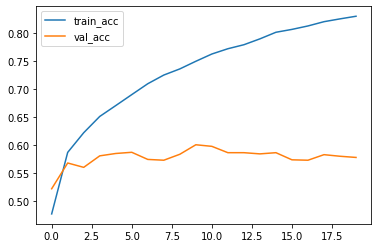

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_acc', 'val_acc'])
plt.show()

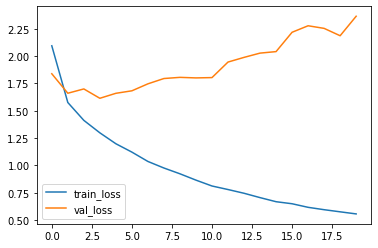

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [30]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [31]:
model.predict(x=test_generator, verbose=2)

143/143 - 20s


array([[1.2876749e-01, 4.2273427e-05, 2.1097887e-01, ..., 6.1023030e-08,
        2.9088452e-04, 3.7875318e-06],
       [6.3699669e-01, 6.7272701e-08, 5.1252451e-03, ..., 7.9126630e-07,
        9.8688324e-06, 9.4498915e-05],
       [2.7015223e-03, 1.2325502e-07, 1.3021182e-07, ..., 2.6574966e-07,
        2.0060716e-04, 8.1077488e-03],
       ...,
       [7.2355715e-07, 5.9716870e-10, 6.1657094e-12, ..., 4.1088470e-08,
        2.7423896e-13, 5.6803226e-01],
       [7.9638500e-07, 3.0948901e-13, 4.4332281e-12, ..., 7.4086916e-14,
        1.6505120e-11, 9.9999833e-01],
       [2.8443360e-01, 1.5532906e-09, 3.3678734e-07, ..., 2.3623925e-05,
        1.8183514e-09, 2.2038516e-01]], dtype=float32)

In [32]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model("/content/drive/MyDrive/resnet50.h5")